# Jupyter Basics

Jupyter is a _development environment_ for developing computer programs.  Think of a development environment as a program in which you write your (Python) programs.

Code is typed into multiple "cells," which are the gray rectangles with the <span style="font-family:'Courier New'">In[]</span> prompt to the left.  Code can be executed individually, cell-by-cell.  To execute the code in a cell, select the cell and click simultaneously on Shift+ Enter.

Jupyter also allows headings, text, bullet points, the embedding of images, the embedding of Internet links, LaTex scientific typesetting, and other useful visual displays.  The technique is called markdown, but we will not have time in this session to cover this topic.  However, here are some references you can check out:

- [Markdown Link 1](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)
- [Markdown Link 2](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
- [Markdown Link 3](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
- [Markdown Link 4](http://nestacms.com/docs/creating-content/markdown-cheat-sheet)

# Let's Do Some Programming

## First Program

- Type this statement in the cell below: <span style="font-family:'Courier New'">print('Hello World!')</span>
- Hit _Ctrl + Enter_ simultaneously to execute the code in the cell

## Assignment Statements

- Assignment statements have  an equals sign, <span style="font-family:'Courier New'">=</span>, in them.
- The right-hand side is computed and assigned to the variable(s) on the left-hand side
    - <span style="font-family:'Courier New'">m</span> is the variable name we use below
- Variables store data values
    - Variable names start with letters, and can have numbers, underscores, upper and lowercase characters
    - VARIABLE NAMES AND PYTHON COMMANDS ARE CASE SENSITIVE!!!!!!!

In [ ]:
m = 'Hello world!'
print(m)

In [ ]:
print(M)

In [ ]:
Print(m)

Your turn!  Assign a string to a variable and print the value of the variable.

We will see shortly that variables like <span style="font-family:'Courier New'">m</span> can be of several types.  For starters, we see that <span style="font-family:'Courier New'">m</span> is a string data tpye, that is, it contains text.

In [ ]:
type(m)

## Output in Jupyter Notebooks

The <span style="font-family:'Courier New'">print()</span> function can always get be used in Jupyter or Spyder editors to output the contents of variables.

In Jupyter, you can also simply list a variable on the last line of the code and its contents will be displayed.  This works only in Jupyter and not in ither editors.

In [ ]:
print(m)

In [ ]:
m

# Applications

The sections below contain examples of analyses that can be done with Python as motivation for learning Python.  You will not be able to do many of them, now anyway, because some use concepts that we don't have time to cover in this course and others use Python packages that you do not yet have installed.

## Neural Networks

Neural networks are mathematical computation devices that mimic how the human brain works.

One task frequently assigned to neural networks is called classification, whereby input data that describes an object is fed into the neural network, which classifies, or categorizes, the object.  One example is hadnwriting recognition where the pixels of an image are fed into a neural network, which with high probability, classifies the image as one of two digits.  The MNIST handwriting dataabse is the most frequenctly used data in this regard.

![MNIST Neural Network](images/NeuralNetwork.jpg)

_Warning: This code will not run on your machine because it requires a Python package to be installed._

In [ ]:
import matplotlib.pyplot as plt

from keras import models
from keras.utils import to_categorical
import numpy as np

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Load Data Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print ("train_images.shape",train_images.shape)
print ("len(train_labels)",len(train_labels))
print("train_labels",train_labels)

print("test_images.shape", test_images.shape)
print("len(test_labels)", len(test_labels))
print("test_labels", test_labels)

#Reshape to 60000 x 784
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Reduce range of data to 0,1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# `to_categorical` converts this into a matrix with as many
# columns as there are classes. The number of rows
# stays the same.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



#Load model and weights
json_file = open('data/ff_mnist.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('data/ff_mnist.h5')
print("Loaded neural network model from disk")

#Evaluate
loaded_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Test 1 on a single image
#answer = np.array([[0,0,0,0,0,0,0,1,0,0]], dtype='float32')
#score = loaded_model.evaluate(image,answer)

# Test 2 on multiple images
score = loaded_model.evaluate(test_images,test_labels)
test_digits = np.argmax(test_labels, axis=1)

print("%s: %.2f%%" % (loaded_model.metrics_names[0], score[0]*100))
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


''' Loop through some examples '''
num2show = 10
images = test_images[:num2show]
image_predict = loaded_model.predict(images)
image_predict = np.argmax(image_predict,axis=1)
images = images.reshape((num2show, 28 ,28))
#image = image.reshape((28 ,28))
for i in range(len(images)):
    print('\n\nActual label: ' + str(test_digits[i]) + '  Predicted label: ' + str(image_predict[i]))
    plt.imshow(images[i], cmap='gray')
    plt.show()

## Netflix Frequency Histogram

Graph the distribution of Netflix movies over the years in which the movies were released.

This analysis is based on a file of the films offered by Netflix as published here:

[Kaggle Netflix Data](https://www.kaggle.com/shivamb/netflix-shows/data)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/netflix_titles.csv')
df = df[df['type'] == 'Movie']
df

In [ ]:
freq_hist = df['release_year'].value_counts()

years = set(freq_hist.index)
missing = set(range(min(years), max(years)+1)) - years
freq_hist.append(pd.Series([0 for i in range(len(missing))], index = list(missing)))
freq_hist = freq_hist.sort_index()

my_font = {'fontname' : 'Times New Roman', 'size':14}
tickmark_font = {'fontsize':12, 'fontname' : 'Times New Roman'}
fig,ax = plt.subplots()
ax.bar(freq_hist.index, freq_hist.values)
ax.set_ylabel('Number of Movies', **my_font)
ax.set_xlabel('Year', **my_font)
fig.suptitle('Distribution of Netflix Movies by Release Year', **my_font)
fig.canvas.draw()
ax.set_xticklabels([item.get_text() for item in ax.get_xticklabels()], **tickmark_font)
ax.set_yticklabels([item.get_text() for item in ax.get_yticklabels()], **tickmark_font)
plt.show()

## Natural Language Processing (NLP) & Trump's Tweets

The simplest form of natural language processing is to count the number of times each word is used and observe the most frequently used words.

To do this, ultimately, results in a Pareto Diagram, whcih is a histogram with the frequency data plotted in descending order.

Number of words: 418577
                        words
0                        read
1                       great
2                   interview
3                      donald
4                       trump
...                       ...
418572                clinton
418573                 emails
418574                    fbi
418575              documents
418576  https//tco/gyyaneeysa

[418577 rows x 1 columns]
you                     7706
i                       6569
great                   4136
trump                   4007
we                      2733
                        ... 
http//tco/yvjkqke2         1
http//tco/lgcnnmmtsa       1
relying                    1
@mightywhimpfarm           1
#purduecal                 1
Name: words, Length: 53131, dtype: int64


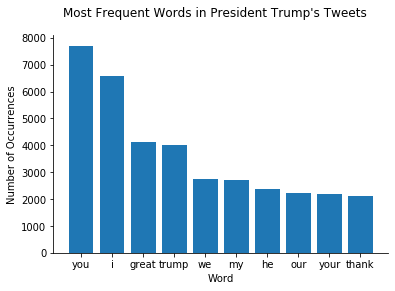

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

''' Input Data '''
f = open('data/words.csv','r', encoding='utf8')
words = f.readlines()
f.close()

""" Get rid of the newline escape sequences """
for i in range(len(words)):
    words[i] = words[i].rstrip()
#words

""" Remove common 'stopwords' that are used frequently but don't impart meaning """
stopWords = ['to', 'the', 'a', 'to', 'is', 'and', 'in', 'of', 'that', 'it', 'be','at', 'this', 'are', 'be', 'for', 'will', 'with', 'at', 'have','on','&amp', 'by']

for i in range(len(words)-1,-1,-1):
    if words[i] in stopWords or words[i] == '@realdonaldtrump':
        del words[i]
        
print('Number of words:', len(words))

dfWords = pd.DataFrame()
dfWords['words'] = words
print(dfWords)

histTrump = dfWords['words'].value_counts()
print(histTrump)

numPts = 10
fig,ax = plt.subplots()
ax.bar(histTrump.index[0:numPts],histTrump.values[0:numPts])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Word')
ax.set_ylabel('Number of Occurrences')
fig.suptitle("Most Frequent Words in President Trump's Tweets")
plt.show()

## Webscraping

This example scrapes HTML data, but data formatted in XML and JSON can be scraped as well.

[John Wall NBA Stats](https://www.basketball-reference.com/players/w/walljo01/gamelog-advanced/2017/)

![John Wall Image](images/JohnWall.jpg)

In [ ]:
import re        # Regular Expressions (Regex) package
import requests  # Internet information requests
from bs4 import BeautifulSoup  # Parsing HTML

html_path = 'https://www.basketball-reference.com/players/w/walljo01/gamelog-advanced/2017/'
html_doc = requests.get(html_path).content

""" parse html """
parsed_html = BeautifulSoup(html_doc, 'lxml')
""" get target row(s) """
#target_rows = parsed_html.find_all('tr', attrs={'id' : 'pgl_advanced.424'})  # will find one row of data
target_rows = parsed_html.find_all('tr', attrs={'id' : re.compile('^pgl_advanced.')})  # uses Regex.  Will find all rows of data

print('Number of games found:',len(target_rows))
print('Stats are in data type:',type(target_rows),'\n')
all_games = []
for row in target_rows:
    new_row = []
    for x in row.find_all('td'):
        new_row.append(x.text)    #x.text.encode("ascii",'ignore')
        
    all_games.append(new_row)
    
print('\nHere\'s the Data')
print(all_games)

## The pandas Package and Basic Machine Learning

Many times in machine learning the analysis is called _classification_ whereby data is used to classify an observation based on its data.  Here, we have data about 150 observations of iris and our job is to find a way to accurately classify each observations as one of the three species based on the data we have.

![Iris Species](./images/AllIrisSpecies.jpg)

In [ ]:
def predict(row,b1,b2):
    if row['PetalLengthIn'] <= b1:
        return 'Iris-setosa'
    elif row['PetalLengthIn'] <= b2:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

def evalPredict(row):
    if row['Predict'] == row['Species']:
        return 1
    else:
        return 0
    
import matplotlib.pyplot as plt
import pandas as pd

analytics = False

""" Input data """
df = pd.read_csv('data/Iris.csv')
 
""" Convert Dimensions to Inches """
InPerCm = 2.54   # Conversion factor for inches to centimeters
df['PetalLengthIn'] = df['PetalLengthCm'] / InPerCm
df['SepalLengthIn'] = df['SepalLengthCm'] / InPerCm

""" Analytics: Set support vectors """
if analytics:
    setosa_versi = 1.0
    versi_virginica = 1.9
    df['Predict'] = 'N/A'
    df['Predict'] = df.apply(predict,args=(setosa_versi,versi_virginica),axis=1)
    df['correct'] = 0
    df['correct'] = df.apply(evalPredict,axis=1)
    print('Prediction Accuracy: ',sum(df['correct']/len(df['correct']))) 

        
""" Create variables for accessing the Figure and Axes sub-objects """
fig,ax = plt.subplots()

""" Axes sub-object properties and methods """
color = ['r','b','g']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(len(species)):
    ax.scatter(df.loc[df['Species'] == species[i]]['SepalLengthIn'],df.loc[df['Species'] == species[i]]['PetalLengthIn'],c=color[i],label=species[i], alpha=0.5,s=75)
ax.yaxis.set_label_text('Petal Length (in)', fontsize = 16)
ax.xaxis.set_label_text('Sepal Length (in)', fontsize = 16)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
if analytics:
    ax.axhline(setosa_versi)
    ax.axhline(versi_virginica)

""" Figure sub-object properties and methods """
fig.suptitle('Sepal Length versus Petal Length', fontsize = 20)
fig.set_size_inches(10,7)
fig.savefig('sepLenPetLen.jpg')

""" Display graph """
plt.show()

## Text Processing: Regular Expressions

Regular Expressions is commonly referred to by its contraction: RegEx.  It is frequently used in NLP, as well in validating that data being input conforms to feasibility constraints, for example, whether an entry is a valise phone number, zip code, email address, or credit card number.

In [ ]:
import re

text = '''23187 
This is just a test with a zip code here: 12345-4321
This is another test
Blah blah blah
23187-1111
14850
92520
Just text
Random text
More random test
90201'''

zip_re = re.compile('(^|\W)\d{5}(?:[-\s]\d{4})?')

text = text.split('\n')
for line in text:
    found_text = zip_re.search(line)
    if found_text:
        print(found_text.group(0).lstrip())

## Optimization and Connection with Database

The term _interoperability_ denotes the successful connectivity between multiple programs to achieve a result.

In this example, where the operations of a large supply chain are optimized, Python is used in conjunction with another piece of optimization software called Gurobi.

![Interoperability](./images/interoperability.jpg)

_Warning: This code will not run on your machine because it requires a Python package to be installed._

In [ ]:
from gurobipy import *
import mysql.connector as mySQL
import datetime

mysql_user_name =  'Jim'
mysql_password = 'MySQL'
mysql_ip = '127.0.0.1'
mysql_db = 'assign'

folder = 'N:/Users/Jim/GoogleDrive200300/BBAPython/'

def db_connect():
    cnx = mySQL.connect(user=mysql_user_name, passwd=mysql_password,
                        host=mysql_ip, db=mysql_db)
    return cnx

'''
def db_get_data(problem_id):
    cnx = db_connect()
    cursor = cnx.cursor()
    cursor.execute("CALL spGetBinpackCap(%s);" % problem_id)
    bin_cap = cursor.fetchall()[0][0]
    cursor.close()
    cursor = cnx.cursor()
    cursor.execute("CALL spGetBinpackData(%s);" % problem_id)
    items = {}
    blank = cursor.fetchall()
    for row in blank:
        items[row[0]] = row[1]
    cursor.close()
    cnx.close()
    return bin_cap, items'''

def getDBDataList(spName):
    cnx = db_connect()
    cursor = cnx.cursor()
    #cursor.execute(commandString, multi=True)
    cursor.callproc(spName)
    items = []
    for result in cursor.stored_results():
        for x in result:
            items.append(x[0])
    cursor.close()
    cnx.close()
    return items
    
def getDBDataListX(spName):
    cnx = db_connect()
    cursor = cnx.cursor()
    cursor.callproc(spName)
    items = []
    for result in cursor.stored_results():
        for item in result:
            sub_list = []
            for ele in item:
                sub_list.append(ele)
            items.append(sub_list)
    #for item in list(cursor):
    #    sub_list = []
    #    for ele in item:
    #        sub_list.append(ele)
    #    items.append(sub_list)
    cursor.close()
    cnx.close()
    return items
    
def getDBDataDictEle(spName, my_args):
    cnx = db_connect()
    cursor = cnx.cursor()
    cursor.callproc(spName, my_args)
    items = {}
    for result in cursor.stored_results():
        for x in result:
            items[x[0]] = x[1]
        break
    cursor.close()
    cnx.close()
    return items
    
def getDBDataDict(spName, my_args=None):
    cnx = db_connect()
    cursor = cnx.cursor()
    if my_args:
        cursor.callproc(spName, my_args)
    else:
        cursor.callproc(spName)
    items = {}
    for result in cursor.stored_results():
        for row in result:
            items[row[0]] = row[1:len(row)]
    cursor.close()
    cnx.close()
    return items
    
def getDBDataDictTup(spName, my_args):
    cnx = db_connect()
    cursor = cnx.cursor()
    cursor.callproc(spName, my_args)
    items = {}
    for result in cursor.stored_results():
        for row in result:
            items[(row[0],row[1])] = row[2]
    cursor.close()
    cnx.close()
    return items
    
trail_cu_ft = 4000.0
days_year = 365.0

#problem_id = 0
problems = getDBDataList('spGetProblemIds')

# create Gurobi model
m = Model("Store Assignment Problem")
#m.ModelSense = GRB.MINIMIZE
    
for problem_id in problems:
    dist = getDBDataDictTup('spGetDist', (problem_id,))  # Key: (DC id, Store ID),  Value: distance
    dcs = getDBDataDict('spGetDcs', (problem_id,))       # SELECT id, cap_cubic_feet, cap_doors, cap_drivers 
    stores = getDBDataDictEle('spGetStores', (problem_id,))     # SELECT id, vol_daily

    y = {}
    for m_key in dist.keys():
        y[m_key] = m.addVar(vtype=GRB.BINARY,name='y_'+str(m_key[0])+"_"+str(m_key[1]))
        
    m.update
    
    for this_key in dcs.keys():       # Capacity constrints
        m.addConstr(quicksum(y[tup_key] * stores[tup_key[1]] for tup_key in [tup for tup in y.keys() if tup[0] == this_key]), GRB.LESS_EQUAL, dcs[this_key][0])  # DC cu ft capacity
        m.addConstr(quicksum(y[tup_key]  for tup_key in [tup for tup in y.keys() if tup[0] == this_key]), GRB.LESS_EQUAL, dcs[this_key][1])  # DC doors capacity
        m.addConstr(quicksum(y[tup_key] * stores[tup_key[1]] / trail_cu_ft for tup_key in [tup for tup in y.keys() if tup[0] == this_key]), GRB.LESS_EQUAL, dcs[this_key][2])  # DC drivers capacity    

    for thisStore in stores.keys():  # Each store must be assigned to one DC
        m.addConstr(quicksum(y[tup_key] for tup_key in [tup for tup in y.keys() if tup[1] == thisStore]), GRB.EQUAL, 1)

    m.setObjective(quicksum(days_year * dist[tup] * y[tup] * stores[tup[1]] / trail_cu_ft for tup in y.keys()),GRB.MINIMIZE) 

    m.update()
    start_time = datetime.datetime.now()
    m.optimize()
    stop_time = datetime.datetime.now()



    print('\n\n==================================\n')
    print('Problem',problem_id)
    print('Optimal Objective Function Value:', m.ObjVal)
    print('Time required for optimization:',stop_time - start_time)
    
    
    
filename = 'tableauOpt.csv'
store_dict = getDBDataDict('spGetTableauStores')   # Only do this for problem_id = 1
f = open(folder+filename, "w")
f.write('store,dc,name,lat,lon,type,scenario,size\n')

for m_key in dist.keys():
    if y[m_key].x == 1:
        f.write(str(m_key[1])+","+str(m_key[0])+","+'Store '+str(m_key[1])+","+str(store_dict[m_key[1]][0])+","+str(store_dict[m_key[1]][1])+",store,Opt,1\n")    

dc_data = getDBDataListX('spGetTableauDCs')
for row in dc_data:
    f.write(str(row[0])+","+str(row[0])+","+str(row[1]).replace(",","")+","+str(row[2])+","+str(row[3])+",dc,Opt,7\n")
f.close()  

![Optimal Store Assignment](images/Opt.jpg)

# Programming Basics: Modus Operandi

To make this session interesting, we will focus on solving a problem and learning Python techniques that are applicable to it.  Our task is:

<p><center><b>Graphing temperature data from a data file</b></center></p>

This task will present hurdles that we will see how to negotiate with Python.  Each of these hurdles will be motivation for learning a different set of Python skills.

Accordingly, we will be cycling back and forth between the problem and learning the necessary fundamentals.

# Our Problem: Inputting Data

Data can be inputted into a Python program from these sources:

- Keyboard input
- Comma delimited text files
- Other text files (space, tab delimited)
- JavaScript Object Notation (JSON) files
- HyperText Markup Language (HTML) text files
- Internet HTML files
- eXtensible Markup Language (XML) files
- Databases
- Other software (e.g., Gurobi)

Our input comes from a comma delimited text file named <span style="font-family:'Courier New'">WburgTemp.csv</span>, which contains daily temperature data for Williamsburg in 2019. Each row of data in that file contains these values, seperated by commas: 

<ol>
    <li> An integer indicating the day of the year,</li> 
    <li> Low daily temperature, and </li>
    <li> High daily temperature. </li>
</ol>

Our tasks are the following:

<ol>
<li> Input the data into a workable format </li>
<li> Graph the high temperature on a daily basis over the year </li>
<li> Graph the difference between high and low temperatures a daily basis over the year </li>
<li> Compute the mean, median, maximum, minimum, and standard deviation of the high temperatures for 2019 </li>
</ol>

We start by opening the input file using the variable <span style="font-family:'Courier New'">f</span>, which allows us to access the data.  We use the <span style="font-family:'Courier New'">.readlines()</span> for accessing the data and putting it in a variable called <span style="font-family:'Courier New'">data</span>, which we output for our viewing.

In [ ]:
f = open('WburgTemp.csv')
data = f.readlines()
f.close()
data

Okay, this opens up a big can of worms:

- What do the brackets <span style="font-family:'Courier New'">[</span> and <span style="font-family:'Courier New'">]</span> mean?
- What do the single quotes mean?
- What is the  <span style="font-family:'Courier New'">\n</span>?

This brings us into a discussion about data types.

The function <span style="font-family:'Courier New'">type()</span> tells us what kind

In [ ]:
type(data)

This demonstrates that the square brackets denote the list data type.  So, let's learn a bit about lists.

Pardon me while I do a little housekeeping that will make it easy to reload the data if we need to.

In [ ]:
def load_data():
    f = open('WburgTemp.csv')
    data = f.readlines()
    f.close()
    return data

# Fundamentals: The List Data Type

- Specified by square brackets
- Can contain mixed types of data
- Access entire list by typing variable name
- Can access individual elements by index
    - 0-based, integer indices
- Mutable: elements can be changed and deleted

In [ ]:
myList = [1,3,5,7]
print(myList)

In [ ]:
myList1 = [1.0, 3, 5.0, 7]
print(myList1)

In [ ]:
print(myList1[0])
print(myList1[1])
print(myList1[2])
print(myList1[3])

In [ ]:
myList1[0] = 99
myList1

Lists are mutable: you can change and delete elements.

Multiple elements of a list can be extracted using "slice" operations.  List slices can be taken in many different modes, but the basic form is <span style="font-family:'Courier New'">myList[b:e]</span>, where <span style="font-family:'Courier New'">b</span> is the index of the first element you want to extract and <span style="font-family:'Courier New'">e</span> implies that the index of the last element extracted is <span style="font-family:'Courier New'">e-1</span>. 

**Important**: list indices start with 0.

In [ ]:
myList1[1:3]

**Important:** Note in the cell above that the element with index 3 was not included.

In [ ]:
myList2 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]

Your turn!

From the variable <span style="font-family:'Courier New'">myList2</span>, perform these extractions:
- Extract the element whose index is 2
- Extract the 3rd through the 9th elements

You can add elements onto the end of a list using the <span style="font-family:'Courier New'">.append()</span> function, as shown below.

In [ ]:
print(myList)
myList.append(9)
print(myList)

Your turn!  Type a statement that appends a value to one of the lists above and then prints the result.

# Fundamentals: The String Data Type

What are the single quotes?

In [ ]:
data[0]

In [ ]:
type(data[0])

<span style="font-family:'Courier New'">str</span>, again, denotes a string variable, that is text data.

# Fundamentals: Other Data Types

We will need to be concerned with a other types of data to do this problem.

## Integers

- Integers appear without decimal points

In [ ]:
age = 27
print(type(age))
print(age)

In [ ]:
newAge = age + 3
print(newAge)

In [ ]:
print(newage)

## Floating Point Numbers

- Floating point numbers appear with decimal points.

In [ ]:
temperature = 75.2
print(temperature)
temperature = 75.
print(temperature)

In [ ]:
temperature = 75
temperature = temperature + 2
print(temperature)

Note the shorthand notation below for adding a value to a variable.

In [ ]:
temperature += 2.0
print(temperature)

Adding a floating-point value to an integer value results in a floating-point value.

## Your Turn!

- Create two variables
- Assign values to the variables
- Add the variables into a third variable
- Print out the value of the third variable
- Use the <span style="font-family:'Courier New'">type()</span> function to check the type of the summand

# Our Problem: Status

The <span style="font-family:'Courier New'">data</span> variable is currently a list of strings, where each string contains multiple data fields, which we need to break apart.  We will need to do this string by string within the list, one at a time.  So we need some way to access each string.  We have seen how to access elements within a list using square brackets and an index.

In [ ]:
data[:5]

# Fundamentals: For Loops

- The cell below shows the basic structure of a <span style="font-family:'Courier New'">for</span> loop.
- For loops execute as many times as there are elements in the list
  - We say that we are _iterating_ through the list
- In each iteration, the variable that comes after the <span style="font-family:'Courier New'">for</span> keyword will be assigned a value equal to the elements in the list, in turn
- We can check the values of <span style="font-family:'Courier New'">i</span> with a print statement.
- A colon comes at the end of the <span style="font-family:'Courier New'">for</span> statement.
- All statements to be executed within the loop are indented by 4 spaces

In [ ]:
for i in [0, 5, 2, 8, 6]:
    print(i)

In [ ]:
for i in [0, 5, 2, 8, 6]:
    i = i/2
    print(i)

We can iterate through other data types, but we don't have time in this session to discuss them all.

Your turn!

Iterate through the first 10 elements of <span style="font-family:'Courier New'">data</span> and print each element.

We iterated through a list explicitly above.  We can also iterate through the <span style="font-family:'Courier New'">data</span> list by using the indices of the list, as shown below.

In [ ]:
for i in [0,1,2,3,4]:
    print(data[i])

We have a problem, however, that we won't know how many elements are in a list when we write the program.  Furthermore, we want our program to be flexible to handle any data file we might read.

Two Python functions come to our rescue here:

- <span style="font-family:'Courier New'">len()</span>
  - Can be used to get the number of elements in a list (length)
- <span style="font-family:'Courier New'">range(x)</span>
  - Generates consecutive integers from 0 to <span style="font-family:'Courier New'">x-1</span>

In [ ]:
len(data)

In [ ]:
print(list(range(10)))

Your turn!

Can you figure out how to iterate through <span style="font-family:'Courier New'">data</span> while printing out each of its elements?

# Our Problem: Status

Okay, we can iterate through <span style="font-family:'Courier New'">data</span>, but we need to break apart the data into seperate fields: i.e., Day, High Temperature, and Low Temperature.  To accomplish that we need to learn how to split text.

# Fundamentals: Splitting Text

Before we actually split the data, we need to get rid of the <span style="font-family:'Courier New'">\n</span> character: this indicates a newline.  We will use the <span style="font-family:'Courier New'">strip()</span> command to do so.

In [ ]:
print('\n\n\n\n\n')

In [ ]:
data[1]

In [ ]:
data[1].strip()

In [ ]:
data[1]

We seemed to get the job done, but not really.  The <span style="font-family:'Courier New'">strip()</span> command doesn't revise the content of a string variable _in place_ but rather makes a copy of the variable's contents.  We need to reassign the stripped version back to the variable, as follows.

In [ ]:
data = load_data()

In [ ]:
data[1] = data[1].strip()
data[1]

Perfect!  Now we can split the string, at the commas, into multiple strings with the <span style="font-family:'Courier New'">split()</span> command.

In [ ]:
data[1].split(',')

The <span style="font-family:'Courier New'">split()</span> function creates a list containing all the flieds that were separated by commas.

In [ ]:
data[1]

Same story, <span style="font-family:'Courier New'">split()</span> makes a copy and doesn't change the value of the original variable.

In [ ]:
data[1] = data[1].split(',')
data[1]

In [ ]:
data[:5]

We need to <span style="font-family:'Courier New'">strip()</span> and <span style="font-family:'Courier New'">split()</span> every element of the <span style="font-family:'Courier New'">data</span> list.  Can you figure out how to accomplish that task with the statements we have seen?

You will need to execute the cell below to initialize the <span style="font-family:'Courier New'">data</span> list.

In [ ]:
data = load_data()

We can combine the <span style="font-family:'Courier New'">strip()</span> and <span style="font-family:'Courier New'">split()</span> commands into one statement.  This is called _chaining_ commands. 

In [ ]:
data[2] = data[2].strip().split(',')
data[2]

# Fundamentals: Another Look at Lists

Take a look at the first 5 elements of <span style="font-family:'Courier New'">data</span>.  Describe its structure.

In [ ]:
data[:5]

Do you have any ideas on how we might access an individual string value?  For example, how would you access the high temperature of 68 for 1/1/2019?

In [ ]:
data[1]

So, <span style="font-family:'Courier New'">data[1]</span> is a list.  How do we access elements within a list?

So, accessing elements of lists of lists, or multi-level lists requires multiple square brackets and indices.

# Fundamentals: Data Conversion

We often need to change the data type of a variable.

We want these data types:

<ol>
    <li> Day index (integer) </li>
    <li> Temperatures (integer) </li>
    <li> Date (string) </li>
</ol>

We can make the conversions using the <span style="font-family:'Courier New'">int()</span> conversion function.

We need to combine these techniques to convert the sub-lists of the list of lists <span style="font-family:'Courier New'">data</span> to have the data types lsited above:

- <span style="font-family:'Courier New'">for</span> loops
- Type conversion
- Accessing elements within lists of lists
- Using the <span style="font-family:'Courier New'">range()</span> and <span style="font-family:'Courier New'">len()</span> functions

There are some starter statements in the cell below to get you started.

In [ ]:
for i in range(1,len(data)):
    # put your statements here

In [ ]:
data

There is at least one problem with completing the code in the cell above, or at least doing it well having to do with our need to do a different data conversion depending on the element within the sub-list.  We can use conditional statements to do that task better and create more flexible code.

# Fundamentals: Conditional Statements

- The if-elif-else construct is used for conditional execution in Python.  
- Conditional execution means that we need to run different code depending on the circumstances.

Let's explain by looking at some code.

In [ ]:
for j in range(len(data[1])):
    if j == 0 or j >=2:
        data[1][j] = int(data[1][j])
data[1]

Details about <span style="font-family:'Courier New'">if-elif-else</span> clause:

- An <span style="font-family:'Courier New'">if</span> clause is required
- An <span style="font-family:'Courier New'">elif</span> clause is optional, but you can have arbitrarily many
- An <span style="font-family:'Courier New'">else</span> clause is optional, but you can have only 1 if you ahve any
- <span style="font-family:'Courier New'">elif</span> is short for <span style="font-family:'Courier New'">else-if</span>
- Once either an <span style="font-family:'Courier New'">if</span>, <span style="font-family:'Courier New'">elif</span>, or <span style="font-family:'Courier New'">else</span> clause is executed, then execution commences below the <span style="font-family:'Courier New'">if-elif-else</span> clause.  That is, only one clause is executed.
- An <span style="font-family:'Courier New'">else</span> clause is a catchall--it is executed if all the preceding clauses fail


# Our Problem: Creating a Graph

We are going to use the <span style="font-family:'Courier New'">matplotlib</span> Python package to create a graph.

Other people have written this code and we are free to import it and use the functions they have defined.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

The simplest program we can use to create a line graph is the following, where we need to create variables named <span style="font-family:'Courier New'">day</span> and <span style="font-family:'Courier New'">hi_temp</span> to contain the <span style="font-family:'Courier New'">x</span> and <span style="font-family:'Courier New'">y</span> access data that we will plot.  These are series of data, actually, and we will create lists to contain these series.

The <span style="font-family:'Courier New'">plt.plot()</span> function creates a line plot and the first argument in the parentheses are the <span style="font-family:'Courier New'">x</span> coordinates of the points and the second argument are the <span style="font-family:'Courier New'">y</span> coordinates.

In [ ]:
plt.plot(day, hi_temp)
plt.show()

We can use a for loop to create the needed lists.

- The statements such as <span style="font-family:'Courier New'">day = []</span> create new, empty lists
- The <span style="font-family:'Courier New'">day.append()</span> statement appends the value in the parentheses onto the end of the list <span style="font-family:'Courier New'">day</span>

In [ ]:
day = []
hi_temp = []
for i in range(1,len(data)):
    day.append(data[i][0])
    hi_temp.append(data[i][2])

Let's go back a execute the prior code cell to see the graph.

# Problem 2: Graph Temperature Difference

This is easy now that we have finished the first graph.  Just use our plotting code and substitute a list called <span style="font-family:'Courier New'">diff</span> for <span style="font-family:'Courier New'">hi_temp</span>.

Notice that I using the character <span style="font-family:'Courier New'">#</span> to create comments, that is, notes taht describe my code that are not executed by the Python interpreter.

In [ ]:
diff = [] # create a new, empty list
for row in data[1:]:
    diff.append(row[2] - row[3])

In [ ]:
plt.plot(day, diff)
plt.show()

There is also an 'advanced' method for creating the <span style="font-family:'Courier New'">diff</span> list called _list comprehension_ that can be accomplished in one line.

I will leave investigation of this technique to you on your own.

In [ ]:
diff = [row[2] - row[3] for row in data[1:]]

# Problem 3: Statistics

Python has many built-in functions, and we have seen some of them: 

- <span style="font-family:'Courier New'">print()</span>
- <span style="font-family:'Courier New'">len()</span>
- <span style="font-family:'Courier New'">range()</span>

We will use others to compute the <span style="font-family:'Courier New'">min()</span> and <span style="font-family:'Courier New'">max()</span> for the high daily temperature.

We will also import the statistics package, which provides an easy way to compute the median and standard deviation.

Here is a reference web page: [Python 3 Built-in Functions](https://docs.python.org/3/library/functions.html)

![Python Reference](images/BuiltInFunctions.jpg)

In [ ]:
import statistics

print('High Temperature Statistics')
print('Mean:', sum(hi_temp)/len(hi_temp))
print('Median:', statistics.median(hi_temp))
print('Minimum:', min(hi_temp))
print('Maximum:', max(hi_temp))
print('Std. Dev.:',statistics.stdev(hi_temp))

# Problem 4: Frequency Histogram

We will create a frequency histogram using a new data type, which is called a dictionary.  So first, a little bit about dictionaries. Dictionaries are good for fast access of data and their structure is as follows:

- Each dictionary element has two pieces of data seperated by a colon
    - key
    - value
- The keys are used to look up the element values
- Keys are unique: no two dictionary elements can have the same keys
- Dictionaries are specified by curly braces

In [ ]:
dictNums = {'zero':0,'one':1, 'two':2}
print(dictNums['zero'])

In [ ]:
dictNums1 = {0:'zero',1:'one', 2:'two'}
print(dictNums1[0])

You can add elements to dictionary like this:

In [ ]:
dictNums1[3] = 'tres'

If dictionary element values are numerical, you can add to them...

In [ ]:
dictWords = {'a':50, 'the': 29, 'this':19}
dictWords

In [ ]:
dictWords['a'] = dictWords['a'] + 1
dictWords

Strategy for building a frequency histogram:

- Create a dictionary where integer temperatures as the keys and values as the number of days
- Initialize the values of the dictionary to zero for all required dictionary keys

Do you have any ideas on how to proceed?

In [ ]:
plt.bar(freq_hist.keys(), freq_hist.values())
plt.show()

# ==============================================================
#                                         Additional Reference Material
# ==============================================================

# Data Types

- Python variables are not declared explicitly
- Variables are of the type of the data that are assigned to them

## Tuples

- Specified by parentheses
- Not mutable: elements can neither be changed nor deleted
- Accessed by index

In [ ]:
t = (0,1,2,3,4)
t[1:3]

In [ ]:
t[1] = 99

## Lists of Lists, Lists of Tuples, Tuples of Lists, Etc.

We do not have time for the details of all that is possible in this realm, bu be aware that complex data structures of these types are possible.

In [ ]:
myList3 = [[0,1,2],[3,4,5],[6,7,8]]
print(myList3[1])

In [ ]:
print(myList3[1][2])

In [ ]:
v = [(0,1),(2,3),(4,5)]

## Strings

- Text
- Specify with single or double quotes
- Assign an integer to a variable:
    - Use an equals sign
- Retrieve the value of a variable:
    - Use the variable name
- Can index by character position
    - 0-based indices
- Concatenate (append) using the + sign

In [ ]:
myName = 'Jim'
yourName = "Sam"
print(myName,yourName)

In [ ]:
myName + ' & ' + yourName

In [ ]:
names = myName + ' & ' + yourName
print(names[0])
print(names[1])
print(names[2])
print(names[3])
print(names[4])
print(names[5])
print(names[6])
print(names[7])
print(names[8])

In [ ]:
names[0:3]

In [ ]:
text = 'He said this: "Hello!"'
text

## Boolean Variables

- Boolean variables values are either True or False
- The first letter of True and False must be capitalized

In [ ]:
x = True
print(type(x))

In [ ]:
not x

## Sets

- Specified by curly braces, but single element values rhater than key:value pairs
- Fast lookup
- Set functions: e.g., union, intersection

In [ ]:
mySet = {1,2,'a','b'}

In [ ]:
1 in mySet

In [ ]:
x = 'a'
x in mySet

In [ ]:
'c' in mySet

In [ ]:
mySet.issuperset({1,2})

In [ ]:
mySet.issubset({1,2,'a','b','m','n'})

In [ ]:
mySet.intersection({0,1,2,3,4,5})

In [ ]:
mySet.remove(2)
mySet

Your turn!

Create two sets:

- A sequence of the multiples of 5 from 5 to 1000
- A sequence of the multiples of 3 from 3 to 1000

Then, find the intersection of those sets.

In [ ]:
# Write your code to solve this question here


# Basic Python Statements

## Addition, Subtraction, Multiplication, & Division

We have already demonstrated addition: substraction is totally analogous.

There exists one special type of division, which refers to Version 2 of Python where the result is truncated to an inter if both numerator and denominator are integers.  This form of division usese a double slash: _//_.

In [ ]:
w = 2.0
x = 2
y = 5.0
z = 5
print('y/w:',y/w)
print('y/x:',y/x)
print('z/w:',z/w)
print('z/x:',z/x)
print('z//x:',z//x)

In [ ]:
print('y*w:',y*w)
print('y*x:',y*x)
print('z*w:',z*w)
print('z*x:',z*x)

Python has the unusual syntax of multiple variables on the left-hand side of an assignment statement, which can eb very convenient.

In [ ]:
x = (4,7)
y,z = x
print(y)
print(z)

In [ ]:
w,y,z = x

## Boolean Operations & Statements

- Boolean logic
    - Operations on True and False values
    - Results are either True of False
- Operators
    - ==, <, >, <=, >=, and, or, ^, not, in, !=
    - Most operators are obvious: the ^ (hat) symbol is for exclusive or
        - False ^ False = False
        - True ^ False = True
        - False ^ True = True
        - True ^ True = False

In [ ]:
3 < 4

In [ ]:
3 > 4

In [ ]:
(3 == 3) ^ (3 != 3)

Write a Boolean expression to  investigate whether teh value of the variable _x_ is both greter than 3 and less then 10

In [ ]:
x = 5
# Put your expression on the next line:


### Data Type Conversions

- Converting data and variables form one type to another

In [ ]:
int()

In [ ]:
float()

In [ ]:
str()

In [ ]:
bool(0) # 0 is converted to False; any other value is interpreted as True

In [ ]:
bool(1)

In [ ]:
x = (4,5)
x = list(x)
x

In [ ]:
x = tuple(x)
x

## Try-Except Code Blocks

If some statement won't work in some foreseen circumstances and you don't want your code to stop, you can use the Try-Except method.  For example, if you try to change the value associated with a dictionary key that does not exist, then you will get an error.  You can avoid your program crshing using Try-Except.

In [ ]:
dictResponses = {'A': 3, 'B': 5, 'C':3}

In [ ]:
dictResponses['D'] += 1

In [ ]:
try:
    dictResponses['D'] += 1
except:
    dictResponses['D'] = 1
    
dictResponses

## For Loops

- Loops make it easy to execute many thousands or millions of lines very quickly
- For loops are for iterating through an 'iterable' for a known number of times
- These are iterables:
    - lists
    - ranges
    - tuples
    - dictionaries
    - sets
    - generators
- Multiple ways to iterate through iterables

In [ ]:
myList = list(range(5,26,5))
print(myList)
for ele in myList:
    print(ele)

In [ ]:
for i in range(len(myList)):
    print(myList[i])

In [ ]:
for i in range(len(myList)):
    myList[i] = 99
myList

In [ ]:
myList = list(range(5,26,5))
for ele in myList:
    ele = 99
myList

When you want to loop through a list to change values, you need to use the approach from two cells above.

You can iterate through sets and tuples.

In [ ]:
x = {1,2,3,4,5,6,7,8,9,10,11,12}
print(type(x))
for t in x:
    print(t)

You can iterate through dictionaries, but it requires a slightly different technique using the keys.

In [ ]:
for thisKey in myDiction:
    print(thisKey)
    #print(thisKey,':',myDiction[thisKey])

In [ ]:
myDiction = {'zero':0,'one':1, 'two':2}

keyList = list(myDiction.keys())
keyList.sort()
for thisKey in keyList:
    print(thisKey,':',myDiction[thisKey])

In [ ]:
for key,value in myDiction.items():
    print(key,':', value)

Your turn!  Loop through this dictionary and change the value for every even key to 'even' and every odd key to 'add'

In [ ]:
randsInt = {1: 'N/A',5: 'N/A',7: 'N/A',15: 'N/A',20: 'N/A',24: 'N/A',27: 'N/A',30: 'N/A',31: 'N/A',32: 'N/A',35: 'N/A',\
            38: 'N/A',44: 'N/A',55: 'N/A',83: 'N/A',87: 'N/A',89: 'N/A',93: 'N/A',98: 'N/A',101: 'N/A',104: 'N/A',109: 'N/A'}

# Write the code for your solution here


## While Loops

- Looping when the number of iterations through the loops are unknown
- Requires a Boolean expression in the While statement to determine when to exit the loop
    - Looping continues if Boolean expresion is True
    - Looping ceases if Boolean expression in False 

Loop through the list variable _randNums_ until the sum of the values first exceed 5.  Print out the sum and the number of values that were added to obtain that total.

In [ ]:
randNums = [0.524,0.707,0.738,0.443,0.743,0.131,0.846,0.697,0.632,0.508,0.284,0.455,0.242,0.312,\
            0.088,0.113,0.824,0.74,0.892,0.425]

In [ ]:
total = 0
numValues = 0
while total <= 5:
    total += randNums[numValues]
    numValues +=1
print(numValues, 'terms were summed in order to obtain a total of',total)

Your turn!  Total the terms in the list below up util, and including the 3rd term with a value of 1.

In [ ]:
thisList = [0.70310152942486,0.7626823486541491,0.8105911024952027,0.7464129769247373,0.8274023468410625,1,0.7526060661489516,\
            0.5247335942256149, 0.712589630730197,0.5664629799743341,1,1,1,0.5550803933264359,0.974270251579191,1,\
            0.7502549111789825,1,0.9206881529420825,1, 0.38334148064397167,0.7421471413395535,0.3646384646728834,\
            0.9989013644395451,0.6900416369125028]
# Write the code for your solution here


## Python Packages

Python packages are code that other people have written that we can use by doing the following:

- Installing the package into our Python development environment (do this once)
- Importing the package code into our programs (do this in every program using a particular package)

These packages are among the most frequently used Python packages and will be the ones most beneficial to you to learn first:

- matplotlib (graphing)
- numpy (numerical computations)
- pandas (data manipulation)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline